In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import yfinance as yf

In [3]:
data = yf.download('AAPL', start='2024-01-01', end='2024-10-15')

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500


In [6]:
X = data[['Open','High','Low','Volume']]
y = data['Close']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVR

In [12]:
model = SVR(kernel='rbf')
model.fit(X_train_scaled,y_train)

SVR()

In [13]:
y_pred = model.predict(X_test_scaled)

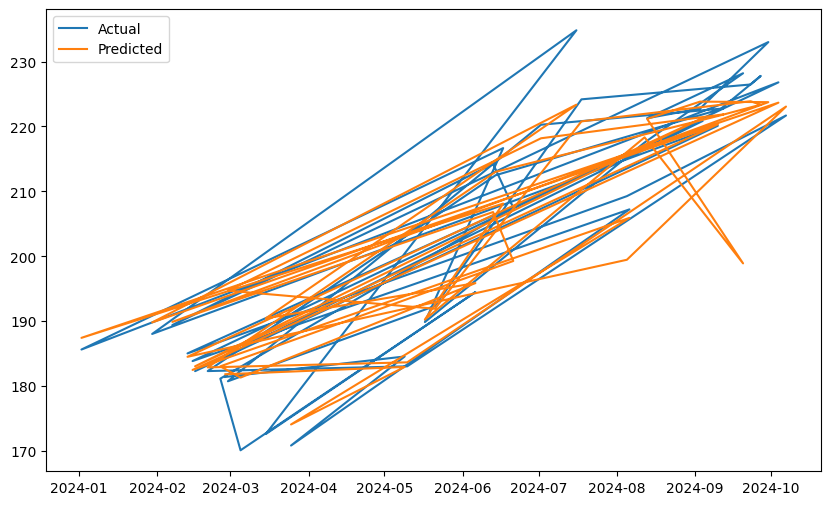

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index,y_test.values,label='Actual')
plt.plot(y_test.index,y_pred,label='Predicted')
plt.legend()
plt.show()
